# 6.4.1 Try to find a way to deal with the noisy data and give yoru reasoning.

Answer: when measuring signals on a device, it is common that the data(signal) contains noise. The way to reduce the noises in this example is to build a filter. For instantce, the noises are higher frequency than the signal. A passive RC low pass filter can be used to removed noises.

# 6.4.2 Heat capacity of a solid 

# Introduction 

Weilun Tang 

Written by 09/11/2021. Modified by 09/12/2021

This program is to calculate the heat capacity of a solid by using the Debye's theory of solids. First, use the Simpson's rule to approximate the integral in the Debye's theory. Then, use the result of the integral to multiply the corresponding given costants in order to obtain the heat capacity. 

# Imports

In [78]:
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt
from scipy import integrate 

# Functions 

In [ ]:
def simpson(start, end, n):                 #n must be even         
    f = lambda x: (x**4 * np.exp(x)) / (np.exp(x)-1)**2
    
    deltax = (end - start) / n
    resultsx = np.linspace(start, end, n+1) # total x = n+1. n is the total intervals 
    resultsy = f(resultsx)
 
    area = 0
    for i in range(0,n,2): 
        area += 1/3*deltax*(resultsy[i]+4*resultsy[i+1]+resultsy[i+2])
    return area

def debye(T, integral):
    k = scipy.constants.Boltzmann
    rho = 6.022 * 10**28
    theta = 428
    V = 0.001                               #in m^3
    return 9 * V * rho * k * (T / theta)**3 * integral

# Main Loop

The heat capacity Cv at  5 K is:  0.309894217325236
The Simpson's rule:  25.97575760906729
scipy.integrate.quad():  (25.975757609067312, 3.3526582698603646e-07)


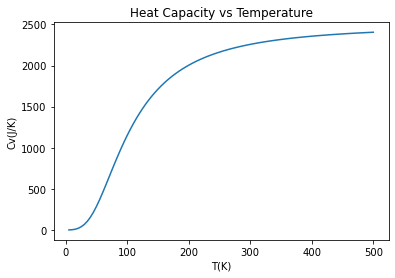

In [87]:
#t is the temperature, user can change t to any desired value
t = 5                 
print("The heat capacity Cv at ", t, "K is:" ,debye(t, simpson(1e-15, theta / t, 3000)))

#Evaluate the integral in the Debye's theory of solids using the Simpson's rule and 
#the built-function integrate.quad().
#The results from these two methods are about the same. 
#integrate.quad() returns the error of the approximation 
print("The Simpson's rule: ",simpson(1e-15, theta / t, 2000))
print("scipy.integrate.quad(): ",integrate.quad(f, 1e-15, theta / t))


#Plot the heat capacity as a function of temperature from T = 5K to T = 500K
T = np.linspace(5, 500, 100)
plt.plot(T, debye(T, simpson(1e-15, theta / T, 2000)))
plt.title("Heat Capacity vs Temperature")
plt.ylabel("Cv(J/K)")
plt.xlabel("T(K)")
plt.show()
